In [3]:
"""
The following modules need to be installed in order to run the file:
pandas
numpy
sklearn
matplotlib
scipy
seaborn
"""

import pandas as pd
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn import linear_model
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

from scipy import stats
df = pd.read_csv('nyc-rolling-sales.csv')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn import preprocessing




# INFO284 Semester handin
# Group number: 7839
# Exam id's: 149, 197, 280, 109
## Word count excluding table of contents and reference list: 
## Table of contents
## 1.0 The Data
### 1.1 Data inspection and feature selection
### 1.2 Handling non-numericals and missing values
### 1.3 Outliers
## 2.0 Preprocessing
### 2.1 One-hot encoding
### 2.2 Multivariate feature imputation
### 2.3 Scaling data
### 2.4 Train-test split
## 3.0 Basic principles of supervised machine learning
### 3.0.1 Regression and classification problems
### 3.0.2 Overfitting and underfitting 
### 3.1 Linear regression
### 3.2 Random forest regressor
### 3.3 Regularization
### 3.4 Lasso regression
### 3.5 MLP Regressor and classifier
## 4.0 Conclusion
## 5.0 Reference list


# 1.0 The data

## 1.1 Data inspection and feature selection

In this notebook we will examine and analyze a dataset from the city of New York. The dataset is a record of every building or building unit sold in the New York City property market over a 12-month period. The information given about the datset is limited and all we know on previous precocessing is that the dataset is "slightly cleaned". Given this information and as is common practice we hould have a quick look at some of the raw data and it's structure.

In [2]:
#Display data to get overview
pd.set_option("display.max.columns", None)
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Above we can see that this is a big dataset with almost 85 000 rows and 22 columns. We can quickly spot that there are multiple datatypes and some abnormalities. Some rows have missing information, and some columns appear to be empty. Let's take a closer look at the different datatypes.

In [3]:
#Using pd.info() to get the different Dtypes of the dataset features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

From the quick inspection above we should have a closer look at some of the data columns.

In [4]:
df['EASE-MENT']

0         
1         
2         
3         
4         
        ..
84543     
84544     
84545     
84546     
84547     
Name: EASE-MENT, Length: 84548, dtype: object

In [5]:
df['Unnamed: 0']

0           4
1           5
2           6
3           7
4           8
         ... 
84543    8409
84544    8410
84545    8411
84546    8412
84547    8413
Name: Unnamed: 0, Length: 84548, dtype: int64

In [6]:
df['SALE DATE']

0        2017-07-19 00:00:00
1        2016-12-14 00:00:00
2        2016-12-09 00:00:00
3        2016-09-23 00:00:00
4        2016-11-17 00:00:00
                ...         
84543    2016-11-28 00:00:00
84544    2017-04-21 00:00:00
84545    2017-07-05 00:00:00
84546    2016-12-21 00:00:00
84547    2016-10-27 00:00:00
Name: SALE DATE, Length: 84548, dtype: object

### 1.2 Handling non-numericals and missing values

Looking at these columns, we decided to delete them because they are either filled with NaN-values, some sort of row indexing or dates. Since we only have sales data from one year, but would optimally want to use the different ML models for price prediction in future sales that has not happened yet, we decided to drop SALE DATE from the dataset. External macroeconomical events such as an interest increase or scarcity of available properties in certain months may bias the models.

In [7]:
#Deleting columns
del df['SALE DATE']
del df['Unnamed: 0']
del df['EASE-MENT']

We have to delete the duplicated entries. Since there are a lot features, a completely duplicated entry would either be a mistake entry or an extreme case of nonrandom sampling. 

In [8]:
#Finding number of duplicates in dataset
sum(df.duplicated(df.columns))

1358

In [9]:
#Dropping duplicates from dataset, and verifying that these are dropped. 
df = df.drop_duplicates(df.columns)
sum(df.duplicated(df.columns))

0

Here we can see that we have some different datatypes that are actually numerical, but represented as an object. 
To better interact and work with our dataset we will need to convert some of the features from objects to numerical values.

In [10]:
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['BOROUGH'] = df['BOROUGH'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

Time to go through the dataset and look for missing values

In [11]:
df.columns[df.isnull().any()]

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'], dtype='object')

Looks like we have some missing values in these three columns. We can see this better by visualizing.

There are a lot of NULL-values ,represented with a “-”, in the dataset, represented with this heatmap. These values are mainly in the features SALE PRICE, LAND- and GROSS SQUARE FEET. We will need to remove the rows missing sale price. SALE PRICE is the main feature we are trying to predict, and when a ML model predicts a price for a certain house or property, there is no way of validating the accuracy of the prediction if the SALE PRICE for that house in the test dataset is missing. 

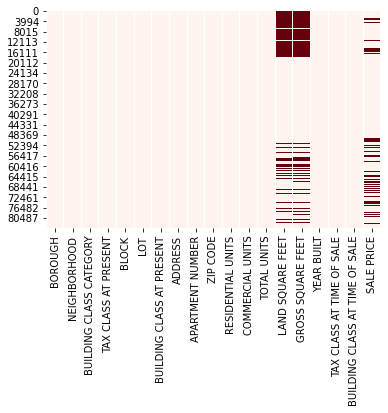

In [12]:
sns.heatmap(df.isnull(), cbar = False, cmap = 'Reds')

In [13]:
# Removing rows in where SALE PRICE is missing value and validating that missing values in feature SALE PRICE is removed.
df = df.replace(' -  ' , np.NaN)
df = df.dropna(subset=['SALE PRICE'])
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  21151
GROSS SQUARE FEET                 21699
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
dtype: int64

In [14]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  21151
GROSS SQUARE FEET                 21699
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
dtype: int64

We want to include as much data as possible for the models to be trained on. To combat the missing values and still keeping most of the data we would want to use, we are going to impute the missing values with sklearn.impute.IterativeImputer. This will be done later. We will set the missing values of land square feet to 0 since it is more likely for properties in New York not to have a garden, backyard etc. since it is a densely populated city. 

In [15]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].replace(np.nan,0)


In [16]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                 21699
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
dtype: int64

### 1.3 Outliers

To better understand the data in gross square feet we can see a snippet and visualize the datapoints to easily spot any outliers. As we can see bellow we have some clear outliers that we are unitrested in as they skew the dataset.

In [17]:
df.sort_values(by = 'GROSS SQUARE FEET', ascending = True)


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
41542,3,MADISON,10 COOPS - ELEVATOR APARTMENTS,2,6835,26,D4,"3202 NOSTRAND AVENUE, 6F",,11229,0,0,0,0.0,0.0,1959,2,D4,223000.0
40410,3,GRAVESEND,10 COOPS - ELEVATOR APARTMENTS,2,6415,22,D4,"8721 BAY PARKWAY, 4F",,11214,0,0,0,0.0,0.0,1954,2,D4,200000.0
40409,3,GRAVESEND,10 COOPS - ELEVATOR APARTMENTS,2,6415,22,D4,"8721 BAY PARKWAY, 5H",,11214,0,0,0,0.0,0.0,1954,2,D4,245000.0
40408,3,GRAVESEND,10 COOPS - ELEVATOR APARTMENTS,2,6415,22,D4,"8721 BAY PARKWAY, 4E",,11214,0,0,0,0.0,0.0,1954,2,D4,200000.0
40407,3,GRAVESEND,10 COOPS - ELEVATOR APARTMENTS,2,6415,22,D4,"8721 BAY PARKWAY, 2F",,11214,0,0,0,0.0,0.0,1954,2,D4,160000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84384,5,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,2087,1002,R3,392 HAWTHORNE AVENUE,,10314,1,0,1,0.0,NaN,1980,1,R3,335000.0
84385,5,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,2087,1021,R3,418 HAWTHORNE AVENUE,,10314,1,0,1,0.0,NaN,1980,1,R3,420000.0
84388,5,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,2089,1006,R3,18 DARCEY AVENUE,,10314,1,0,1,0.0,NaN,1980,1,R3,407000.0
84389,5,WILLOWBROOK,05 TAX CLASS 1 VACANT LAND,1B,730,65,V0,81 KELL AVENUE,,10314,0,0,0,2000.0,NaN,0,1,V0,20000.0


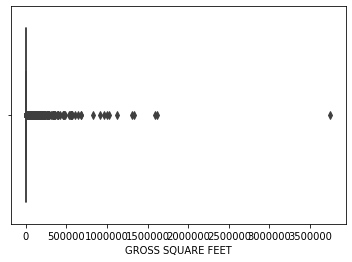

In [18]:
sns.boxplot(x = 'GROSS SQUARE FEET', data=df)
plt.ticklabel_format(style='plain', axis='x')

From the snippet we can see multiple values with zero as value and the boxplot shows us that we have some datapoints that have very big values and skew our dataset. Let's remove the irrelevant features.

In [19]:
#Make temporary dataframe with one colums to compute quantile
temp = df['GROSS SQUARE FEET']

percentile_GSF_UPPER = temp.quantile(0.998) 
print(df.shape)
df.drop(df[df['GROSS SQUARE FEET'] < 10.0].index, inplace = True)
df.drop(df[df['GROSS SQUARE FEET'] > percentile_GSF_UPPER].index, inplace = True)
print (df.shape)

(69281, 19)
(57901, 19)


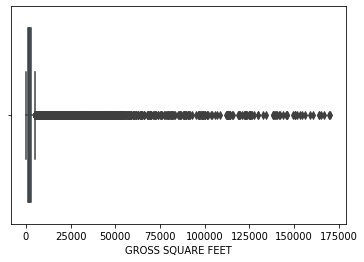

In [20]:
sns.boxplot(x = 'GROSS SQUARE FEET', data=df)
plt.ticklabel_format(style='plain', axis='x')

In [21]:
#Show that minimum is no longer 0
df.sort_values(by = 'GROSS SQUARE FEET', ascending = True)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
33944,3,CONEY ISLAND,41 TAX CLASS 4 - OTHER,4,7062,14,Z2,2913 WEST 17TH STREET,,11224,0,1,1,9503.0,60.0,1930,4,Z2,0.0
39712,3,GERRITSEN BEACH,41 TAX CLASS 4 - OTHER,4,8900,898,Z9,46 ABBEY COURT,,11229,0,0,0,1800.0,80.0,1920,4,Z9,0.0
38556,3,FLATBUSH-EAST,41 TAX CLASS 4 - OTHER,4,7932,534,Z9,5815 AVENUE D,,11203,0,0,0,4000.0,100.0,1950,4,Z9,0.0
41042,3,GREENPOINT,41 TAX CLASS 4 - OTHER,4,2482,8,Z9,56 COMMERCIAL STREET,,11222,0,0,0,2779.0,100.0,1931,4,Z9,0.0
20427,2,HUNTS POINT,41 TAX CLASS 4 - OTHER,4,2775,53,Z9,1330 EAST BAY AVENUE,,10474,0,1,1,9400.0,120.0,1931,4,Z9,500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84384,5,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,2087,1002,R3,392 HAWTHORNE AVENUE,,10314,1,0,1,0.0,NaN,1980,1,R3,335000.0
84385,5,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,2087,1021,R3,418 HAWTHORNE AVENUE,,10314,1,0,1,0.0,NaN,1980,1,R3,420000.0
84388,5,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,2089,1006,R3,18 DARCEY AVENUE,,10314,1,0,1,0.0,NaN,1980,1,R3,407000.0
84389,5,WILLOWBROOK,05 TAX CLASS 1 VACANT LAND,1B,730,65,V0,81 KELL AVENUE,,10314,0,0,0,2000.0,NaN,0,1,V0,20000.0


In [22]:
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,57901.000000,57901.000000,57901.000000,57901.000000,57901.000000,57901.000000,5.790100e+04,36202.000000,57901.000000,5.790100e+04
mean,4265.805737,294.125663,10745.563514,1.826618,0.167424,2.001762,2.437092e+03,3478.699243,1862.733545,1.255857e+06
std,3560.375458,604.312448,1063.062421,6.742283,9.605843,11.755742,2.561873e+04,8848.620257,395.767486,4.739966e+06
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,60.000000,0.000000,0.000000e+00
25%,1345.000000,20.000000,10280.000000,0.000000,0.000000,1.000000,0.000000e+00,1420.000000,1920.000000,2.800000e+05
50%,3384.000000,44.000000,11207.000000,1.000000,0.000000,1.000000,1.958000e+03,2000.000000,1935.000000,5.600000e+05
75%,6249.000000,120.000000,11357.000000,2.000000,0.000000,2.000000,2.730000e+03,2875.000000,1963.000000,9.840000e+05
max,16319.000000,9106.000000,11694.000000,889.000000,2261.000000,2261.000000,4.252327e+06,170230.000000,2017.000000,2.681242e+08


As the sale price is the feature we are trying to predict, we think it is crucial to have a closer look. Here we sort the sale price in descending order. 

In [23]:
df.sort_values(by = 'SALE PRICE', ascending = False)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
9594,1,MIDTOWN WEST,21 OFFICE BUILDINGS,4,1026,21,O5,1706-1720 BROADWAY,,10019,0,2,2,8848.0,52150.0,1918,4,O5,268124175.0
7458,1,MIDTOWN CBD,43 CONDO OFFICE BUILDINGS,,1300,1007,,237 PARK AVENUE,,0,0,0,0,0.0,NaN,0,4,RB,250867763.0
8723,1,MIDTOWN EAST,43 CONDO OFFICE BUILDINGS,4,1360,1008,RB,866 UNITED NATIONS PLAZA,222,10017,0,0,1,0.0,NaN,1967,4,RB,217500000.0
4781,1,GREENWICH VILLAGE-WEST,21 OFFICE BUILDINGS,4,603,28,O3,95 MORTON STREET,,10014,0,11,11,20019.0,154328.0,1911,4,O3,205961801.0
2565,1,FINANCIAL,25 LUXURY HOTELS,4,52,8,H2,133 GREENWICH STREET,,10006,0,318,318,6109.0,130054.0,2014,4,H2,203345000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37870,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1,4989,153,A5,715 EAST 42ND STREET,,11203,1,0,1,1767.0,1785.0,1930,1,A5,0.0
37873,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1,4992,65,S1,935 EAST 45TH STREET,,11203,1,1,2,2700.0,1785.0,1940,1,S1,0.0
37878,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1,4999,10,A9,3501 FARRAGUT ROAD,,11210,1,0,1,1800.0,1400.0,1925,1,A9,0.0
37882,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1,5006,68,A1,662 EAST 32 STREET,,11210,1,0,1,3000.0,2172.0,1920,1,A1,0.0


We can clearly see some outliers in terms of top prices. To further illustrate this, we are going to use a box plot. 

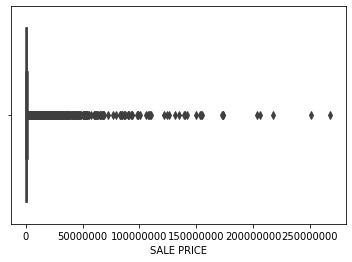

In [24]:
sns.boxplot(x = 'SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')



To get a more representative dataset, we are going to remove top 1 percentile of the rows sorted by sale price. This dataset contains data from both residental and commercial property sales, which in turn gives us very large price range. The top outliers, as presented in the box plot above, will be removed along with the rest of the top 1 percentile of SALE PRICE. We are also going to drop all rows with a SALE PRICE less than $50 000 USD, as these most likely are not sales, but transfers that do not represent the values of the property in question.  


In [25]:
df.sort_values(by = 'SALE PRICE', ascending = False)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
9594,1,MIDTOWN WEST,21 OFFICE BUILDINGS,4,1026,21,O5,1706-1720 BROADWAY,,10019,0,2,2,8848.0,52150.0,1918,4,O5,268124175.0
7458,1,MIDTOWN CBD,43 CONDO OFFICE BUILDINGS,,1300,1007,,237 PARK AVENUE,,0,0,0,0,0.0,NaN,0,4,RB,250867763.0
8723,1,MIDTOWN EAST,43 CONDO OFFICE BUILDINGS,4,1360,1008,RB,866 UNITED NATIONS PLAZA,222,10017,0,0,1,0.0,NaN,1967,4,RB,217500000.0
4781,1,GREENWICH VILLAGE-WEST,21 OFFICE BUILDINGS,4,603,28,O3,95 MORTON STREET,,10014,0,11,11,20019.0,154328.0,1911,4,O3,205961801.0
2565,1,FINANCIAL,25 LUXURY HOTELS,4,52,8,H2,133 GREENWICH STREET,,10006,0,318,318,6109.0,130054.0,2014,4,H2,203345000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37870,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1,4989,153,A5,715 EAST 42ND STREET,,11203,1,0,1,1767.0,1785.0,1930,1,A5,0.0
37873,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1,4992,65,S1,935 EAST 45TH STREET,,11203,1,1,2,2700.0,1785.0,1940,1,S1,0.0
37878,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1,4999,10,A9,3501 FARRAGUT ROAD,,11210,1,0,1,1800.0,1400.0,1925,1,A9,0.0
37882,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1,5006,68,A1,662 EAST 32 STREET,,11210,1,0,1,3000.0,2172.0,1920,1,A1,0.0


In [26]:
percentile_SP_UPPER = np.percentile(df['SALE PRICE'], 99)
percentile_SP_LOWER = np.percentile(df['SALE PRICE'], 14)

print(percentile_SP_LOWER, percentile_SP_UPPER)

#df.sort_values(by=['SALE PRICE'], inplace=True,ascending = True)


df.drop(df[df['SALE PRICE'] < 50000.0].index, inplace = True)
df.drop(df[df['SALE PRICE'] > percentile_SP_UPPER].index, inplace = True)

3000.0 13150000.0


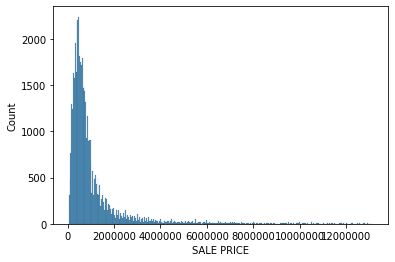

In [27]:
sns.histplot(x = 'SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')

In [28]:
df.sort_values(by = 'SALE PRICE', ascending = True)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
34000,3,CROWN HEIGHTS,01 ONE FAMILY DWELLINGS,1,1248,34,A4,912 STERLING PLACE,,11216,1,0,1,1667.0,2576.0,1901,1,A4,50000.0
75829,4,WOODSIDE,05 TAX CLASS 1 VACANT LAND,1B,1298,271,V0,ROOSEVELT AVENUE,,0,0,0,0,1790.0,NaN,0,1,V0,50000.0
54777,4,ELMHURST,02 TWO FAMILY DWELLINGS,1,1885,41,B3,51-13 94TH STREET,,11373,2,0,2,1862.0,1680.0,1935,1,B3,50000.0
73478,4,SPRINGFIELD GARDENS,01 ONE FAMILY DWELLINGS,1,12576,19,A1,137-31 170TH STREET,,11434,1,0,1,4000.0,2140.0,1975,1,A1,50000.0
82991,5,STAPLETON,31 COMMERCIAL VACANT LAND,4,525,2,V1,THOMPSON STREET,,10304,0,0,0,1000.0,NaN,0,4,V1,50000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,1,CIVIC CENTER,13 CONDOS - ELEVATOR APARTMENTS,2,176,1136,R4,56 LEONARD STREET,49E,10013,1,0,1,0.0,NaN,2007,2,R4,13014468.0
1232,1,CIVIC CENTER,13 CONDOS - ELEVATOR APARTMENTS,2,123,1220,R4,30 PARK PLACE,65A,10007,1,0,1,0.0,NaN,2008,2,R4,13084512.0
3072,1,GRAMERCY,07 RENTALS - WALKUP APARTMENTS,2,907,46,C4,220 EAST 27TH STREET,,10016,20,0,20,2469.0,9625.0,1920,2,C4,13100000.0
13607,1,UPPER EAST SIDE (79-96),10 COOPS - ELEVATOR APARTMENTS,2,1494,32,D4,"960 PARK AVENUE, 10E",,10028,0,0,0,0.0,NaN,1915,2,D4,13100000.0


To get a better understanding of which numerical features that affect the feature SALE PRICE we are going to use a correlation heatmap.

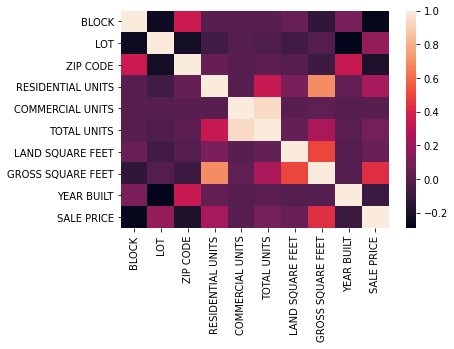

In [29]:
corr = df.corr()
sns.heatmap(corr)

In [30]:
corr['SALE PRICE'].sort_values(ascending=False)

SALE PRICE           1.000000
GROSS SQUARE FEET    0.433426
RESIDENTIAL UNITS    0.242759
LOT                  0.183855
TOTAL UNITS          0.091171
LAND SQUARE FEET     0.054405
COMMERCIAL UNITS     0.009221
YEAR BUILT          -0.088921
ZIP CODE            -0.192797
BLOCK               -0.270534
Name: SALE PRICE, dtype: float64

This heat map visualizes the correlation between the different numerical features and gives us a clear indication on which features to include in the model. From the list we see that the most correlated feature in term of price prediction is gross square feet, total units and residential units.

It would seem intuitive at this point to drop BLOCK, ZIP CODE, and YEAR BUILT since the correlation for them to the SALE PRICE is a negative number. But their correlation cannot be measured with this method even though they are all numerical values. If we look at ZIP CODE, we know for a fact that there is no direct connection between a high zip code number and an expensive house. 



In [31]:
# Creating a seperate df for the last classification model that will predict BUILDING CLASS AT TIME OF SALE
df_Classification = df['BUILDING CLASS AT TIME OF SALE']


df = df.drop(['ADDRESS', 'APARTMENT NUMBER', 'BUILDING CLASS AT TIME OF SALE', 'BUILDING CLASS AT PRESENT', 'NEIGHBORHOOD'], axis=1)

In the above cell we drop a few columns. The reason for this is that these columns holds little relevance in price prediction. 

We are now left with features that can be used to explain the sale price and will offer valuable inputs to our models for price prediction.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48719 entries, 0 to 84547
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   BOROUGH                    48719 non-null  category
 1   BUILDING CLASS CATEGORY    48719 non-null  object  
 2   TAX CLASS AT PRESENT       48719 non-null  category
 3   BLOCK                      48719 non-null  int64   
 4   LOT                        48719 non-null  int64   
 5   ZIP CODE                   48719 non-null  int64   
 6   RESIDENTIAL UNITS          48719 non-null  int64   
 7   COMMERCIAL UNITS           48719 non-null  int64   
 8   TOTAL UNITS                48719 non-null  int64   
 9   LAND SQUARE FEET           48719 non-null  float64 
 10  GROSS SQUARE FEET          27662 non-null  float64 
 11  YEAR BUILT                 48719 non-null  int64   
 12  TAX CLASS AT TIME OF SALE  48719 non-null  category
 13  SALE PRICE                 4871

# 2.0 Preprocessing

## 2.1 One-Hot-Encoding
At this point we have fourteen columns in our dataset, where ten of which are numerical values. This means that we have four columns in our dataset that are categorical or objects. The categorical data is not readable for the algorithms and therefore we must convert them into numerical features. To achieve this, we will apply One-Hot-Encoding to our non-numerical columns. The concept is to replace the categorical variables with new features that have the value 0 or 1. (Muller, Guido, 2017, s.215)
The module pandas have a built-in method to get the numerical values which is called .get_dummies() and we will utilize this to perform the conversion of the categorical features into numerical features. Our dataframe right now has 14 columns.


In [33]:
features = ['BOROUGH', 'BUILDING CLASS CATEGORY','TAX CLASS AT TIME OF SALE', 'TAX CLASS AT PRESENT']
dummies = pd.get_dummies(df[features])


In [34]:
scalableFeatures = df[['BLOCK', 'LOT','ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET', 'YEAR BUILT','SALE PRICE']]

scalableFeatures.isna().sum()

BLOCK                    0
LOT                      0
ZIP CODE                 0
RESIDENTIAL UNITS        0
COMMERCIAL UNITS         0
TOTAL UNITS              0
LAND SQUARE FEET         0
GROSS SQUARE FEET    21057
YEAR BUILT               0
SALE PRICE               0
dtype: int64

## 2.2 Multivariate feature imputation

A common practice is to fill the missing values of the dataset with the mean of that specific feature. However, the IterativeImputer models each feature with missing values as a function of other features which it then uses to estimate the imputation. In our case, the missing features would be the missing values in the GROSS SQUARE FEET column in our dataset, which we will call 'y'. All the other numerical features of the dataset would be called 'X'. The Iterative Imputer fits a regressor on (X,y) for the known y values in the GROSS SQUARE FEET column, and then tries to predict the missing values of y in an iterative manner.

In [35]:
impute_it = IterativeImputer()
imputed = impute_it.fit_transform(scalableFeatures)

In [36]:
imputedDf = pd.DataFrame(imputed, columns = ['BLOCK', 'LOT','ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET', 'YEAR BUILT','SALE PRICE'])

## 2.3 Scaling data
We know that algorithms such as neural networks are sensitive to the scaling of the data (Muller, Guido, 2017, s.134). Since one of our models is based on neural networks, we must scale the data to get better results.

To find which scaler to use we tested the two most common scalers that come with the Sklearn module on a simple MLP regressor model. The model we used only have one hidden layer with 33 neurons, for the solver we used Adam and the activation function was Tanh.

> To choose the scaler for our models we ran three models where the only difference being which scaler we applied to the data. The first model used MinMaxScaler, the second used StandardScaler and the third used RobustScaler. The model that got data trained with RobustScaler got the best score. 

RobustScaler is a scaler that uses standardization to scale the data to a common range, prior to fitting the data to different models. Standardization involves calculating the deviation and mean for each variable and then utilize these values to scale values to have a mean of 0 and a standard deviation of 1. The scaling calculates by subtracting the mean value and dividing by the standard deviation. It can be difficult to standardize input variables with the occurrence of outliers, so what can be done is ignore the outliers when it comes to calculating the mean and the standard deviation. And then use the values that are calculated to scale the variable. (Brownlee, 2020)

In [37]:
# These are all numerical values that we want to scale using our StandardScaler.
scalableFeatures = imputedDf

# Using Standard scaler based on the test we performed. 
scaler = RobustScaler()

# Using the Scaler.fit_Transform method to create a new dataframe with the scaled values. 
df_scaled = pd.DataFrame(scaler.fit_transform(scalableFeatures),columns = scalableFeatures.columns)

# looking at the datafram to see if the scaling was sucsesfull. 
df_scaled


,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
0,-0.565527,-0.291971,-0.919169,2.0,0.0,2.0,-0.063019,3.206249,-0.888889,8.659420
1,-0.563522,-0.182482,-0.919169,4.5,0.0,4.5,0.178113,3.431449,-0.600000,4.762713
2,-0.563120,0.065693,-0.919169,2.5,0.0,2.5,0.214717,2.045256,-0.888889,10.652174
3,-0.562719,-0.102190,-0.919169,3.5,0.0,3.5,-0.018868,1.797789,-0.444444,3.685275
4,-0.563923,-0.182482,-0.919169,4.5,0.0,4.5,0.723396,6.965957,1.533333,14.057971
...,...,...,...,...,...,...,...,...,...,...
48714,0.829640,-0.087591,-0.688222,0.5,0.0,0.5,0.226415,0.747489,1.288889,-0.289855
48715,0.829640,0.233577,-0.688222,0.5,0.0,0.5,0.263396,0.621529,1.288889,-0.144928
48716,0.830041,0.102190,-0.688222,0.5,0.0,0.5,0.830189,0.061071,-0.333333,-0.275362
48717,0.779705,-0.131387,-0.688222,-0.5,7.0,3.0,77.823774,39.898074,1.355556,16.004836


In [38]:
# We had to reset the index of the scaled and dummies dataframe inorder to prevent the concationation to create null values.
df_scaled.reset_index(drop=True, inplace=True)
dummies.reset_index(drop=True, inplace=True)
imputedDf.reset_index(drop=True, inplace=True)
df_Classification.reset_index(drop=True, inplace=True)

# Creating a final datframe for the models that excel with unscaled data.
df_unscaled = pd.concat([imputedDf, dummies], axis = 1)

# Concatinating the features that where one hot encoded and the numerical values that where scaled into one final dataframe.
df = pd.concat([df_scaled, dummies], axis = 1)

# Concatinating the features that where one hot encoded, the numerical values that where scaled and the BUILDING CLASS AT TIME OF SALE
# that we will predict in the classification model.
df_Classification = pd.concat([df_scaled, dummies, df_Classification], axis = 1)

# Taking a look at the final DataFrame.
df.head()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,BOROUGH_5,BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS,BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND,BUILDING CLASS CATEGORY_06 TAX CLASS 1 - OTHER,BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_09 COOPS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_10 COOPS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_11 SPECIAL CONDO BILLING LOTS,BUILDING CLASS CATEGORY_11A CONDO-RENTALS,BUILDING CLASS CATEGORY_12 CONDOS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_13 CONDOS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_14 RENTALS - 4-10 UNIT,BUILDING CLASS CATEGORY_15 CONDOS - 2-10 UNIT RESIDENTIAL,BUILDING CLASS CATEGORY_16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT,BUILDING CLASS CATEGORY_17 CONDO COOPS,BUILDING CLASS CATEGORY_21 OFFICE BUILDINGS,BUILDING CLASS CATEGORY_22 STORE BUILDINGS,BUILDING CLASS CATEGORY_23 LOFT BUILDINGS,BUILDING CLASS CATEGORY_26 OTHER HOTELS,BUILDING CLASS CATEGORY_27 FACTORIES,BUILDING CLASS CATEGORY_28 COMMERCIAL CONDOS,BUILDING CLASS CATEGORY_29 COMMERCIAL GARAGES,BUILDING CLASS CATEGORY_30 WAREHOUSES,BUILDING CLASS CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_34 THEATRES,BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_36 OUTDOOR RECREATIONAL FACILITIES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER,BUILDING CLASS CATEGORY_42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,BUILDING CLASS CATEGORY_43 CONDO OFFICE BUILDINGS,BUILDING CLASS CATEGORY_44 CONDO PARKING,BUILDING CLASS CATEGORY_45 CONDO HOTELS,BUILDING CLASS CATEGORY_46 CONDO STORE BUILDINGS,BUILDING CLASS CATEGORY_47 CONDO NON-BUSINESS STORAGE,TAX CLASS AT TIME OF SALE_1,TAX CLASS AT TIME OF SALE_2,TAX CLASS AT TIME OF SALE_3,TAX CLASS AT TIME OF SALE_4,TAX CLASS AT PRESENT_,TAX CLASS AT PRESENT_1,TAX CLASS AT PRESENT_1A,TAX CLASS AT PRESENT_1B,TAX CLASS AT PRESENT_1C,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_2C,TAX CLASS AT PRESENT_3,TAX CLASS AT PRESENT_4
0,-0.565527,-0.291971,-0.919169,2.0,0.0,2.0,-0.063019,3.206249,-0.888889,8.659420,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,-0.563522,-0.182482,-0.919169,4.5,0.0,4.5,0.178113,3.431449,-0.600000,4.762713,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,-0.563120,0.065693,-0.919169,2.5,0.0,2.5,0.214717,2.045256,-0.888889,10.652174,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,-0.562719,-0.102190,-0.919169,3.5,0.0,3.5,-0.018868,1.797789,-0.444444,3.685275,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,-0.563923,-0.182482,-0.919169,4.5,0.0,4.5,0.723396,6.965957,1.533333,14.057971,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [39]:
# Using label encoder on the df that we will use classification model on. This turns the different classes into numbers.
le = preprocessing.LabelEncoder()
df_Classification['BUILDING CLASS AT TIME OF SALE'] = pd.DataFrame(le.fit_transform(df_Classification['BUILDING CLASS AT TIME OF SALE']))


## 2.4 Train-test split
After we run the get_dummies method and combine our new dataframe with the columns that already were numerical we now have 71 columns in our final dataframe. The 61 new columns that got created from the original 4 categorical features are representing the same information but in a binary system that makes the data readable by the algorithms.

In [40]:
df_unscaled.shape

(48719, 71)

In [41]:
df.shape

(48719, 71)

In [42]:
# Here we can see the final DataFrame where the categorical features are One-hot-encoded and the numerical features are scaled.
df.dtypes

BLOCK                      float64
LOT                        float64
ZIP CODE                   float64
RESIDENTIAL UNITS          float64
COMMERCIAL UNITS           float64
                            ...   
TAX CLASS AT PRESENT_2A      uint8
TAX CLASS AT PRESENT_2B      uint8
TAX CLASS AT PRESENT_2C      uint8
TAX CLASS AT PRESENT_3       uint8
TAX CLASS AT PRESENT_4       uint8
Length: 71, dtype: object

In [43]:
# Splitting the dataset into X,y for the scaled data.
y = df['SALE PRICE']
X = df.drop(['SALE PRICE'], axis = 1)

# splitting the dataset into X,y, for the unscaled data. Theese are going to be used for the models that dont use scaled data.
y_unscaled = df_unscaled['SALE PRICE']
X_unscaled = df_unscaled.drop(['SALE PRICE'], axis = 1)


# Splitting the dataset into X,y, for the Classification model. We are dropping BUILDING CLASS AT TIME OF SALE in X since this is the
# value we are going to predict.
y_Classification = df_Classification['BUILDING CLASS AT TIME OF SALE']
X_Classification = df_Classification.drop(['BUILDING CLASS AT TIME OF SALE'], axis = 1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 34, test_size = 0.3 )

X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(X_unscaled, y_unscaled, random_state= 34, test_size = 0.3 )

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_Classification, y_Classification, random_state= 34, test_size = 0.3 )


In [45]:
clf = GridSearchCV(RandomForestRegressor(),{
    'n_estimators': [100],
    'max_depth': [15],
    'criterion': ['mse'],
    'random_state': [1],
    'n_jobs': [-1]},
    cv = 3, return_train_score = True)

clf.fit(X_train, y_train)
clf.cv_results_

results = pd.DataFrame(clf.cv_results_)
results



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,param_n_jobs,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.744699,0.43618,0.107314,0.00062,mse,15,100,-1,1,"{'criterion': 'mse', 'max_depth': 15, 'n_estim...",0.847031,0.852345,0.880495,0.859957,0.014684,1,0.974073,0.972683,0.969051,0.971936,0.002117


# 3.0 Basic principles of supervised machine learning

## 3.0.1 Regression and classification problems
In supervised machine learning we have two main types of problems, classification, and regression.
 
In a classification problem we are trying to determine where whatever we are trying to predict belongs. The options are different predefined categories and based on the dataset. An example could be to determine whether a person is male, or female based on some information given.
 
In a regression problem we want to predict a continuous number. This number can be given inside a predefined range or any real number. An example of this type of problem could be predicting the price of gemstones given data about their qualities.


## 3.0.2 Overfitting and underfitting
In supervised learning we want to train our models on a set of training data, to then perform predictions on new unseen test data. The ability to make good predictions on unseen data is the model’s ability to generalize. This is where the introduction of the concepts underfitting and overfitting is needed.


A good sign of overfitting is when our model is poor at generalizing. This often means that our model complexity is too high and focusing too much on the details in the training set. By reducing the complexity and emphasis on the training set our model can perform better on unseen data.

On the other hand underfitting is when we have a model that is too simple and is unable to fully capture the complexity of the dataset. This leads to a model that performs poorly on the training set and test set.

This is where the introduction of the concepts underfitting and overfitting is needed. When we train a model and it performs well on the training data, and then poorly on the new unseen data we have a model that is generalizing poorly. This is a sign that we are overfitting.



## 3.1 Linear regression (Least ordinary squares)

Linear models are a very popular class of models and have been thoroughly studied the last few decades. There are in fact many different linear models for regression and the main difference between them is how the different parameters w and b are learned from the training data and their model complexity. (Muller, Guido, 2017, s.49)

This model seeks to minimize the difference between the linear equation and the datapoint values in the model. The model’s performance is measured by calculating the sum of the squared differences between the predictions and the true values, divided by the number of samples. A simple linear model with least ordinary squares is a good start for analysis as it gives a starting point from which to explore further with perhaps other models.


In [46]:
clf = GridSearchCV(LinearRegression(),{
    'fit_intercept': [True, False],
    'normalize': [True, False],},
    cv = 3, return_train_score = True)

clf.fit(X_train, y_train)
clf.cv_results_

results = pd.DataFrame(clf.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.092403,0.011213,0.006613,0.002903,True,True,"{'fit_intercept': True, 'normalize': True}",-1.725731e+22,-6.081390e+22,-0.323388,-2.602374e+22,2.558933e+22,4,0.451511,0.431281,0.449240,0.444011,0.009049
1,0.088941,0.003660,0.005488,0.001650,True,False,"{'fit_intercept': True, 'normalize': False}",4.055233e-01,4.540521e-01,-0.321648,1.793092e-01,3.547836e-01,3,0.451511,0.431290,0.449238,0.444013,0.009044
2,0.088135,0.006118,0.004659,0.000149,False,True,"{'fit_intercept': False, 'normalize': True}",4.055234e-01,4.540656e-01,-0.321648,1.793137e-01,3.547871e-01,1,0.451511,0.431290,0.449238,0.444013,0.009044
3,0.102089,0.023806,0.007609,0.001734,False,False,"{'fit_intercept': False, 'normalize': False}",4.055234e-01,4.540656e-01,-0.321648,1.793137e-01,3.547871e-01,1,0.451511,0.431290,0.449238,0.444013,0.009044


In [47]:
#Here we used the best parameters found in the grid search
linreg = LinearRegression()
linreg.fit(X_train_unscaled, y_train_unscaled)
y_pred_lin = linreg.predict(X_test_unscaled)

print ('VARIANCE SCORE: ',metrics.explained_variance_score(y_test_unscaled ,y_pred_lin))
print ('RMSE: ',np.sqrt(mean_squared_error(y_test_unscaled, y_pred_lin)))
print ('r2_score',r2_score(y_test_unscaled, y_pred_lin))

VARIANCE SCORE:  0.4462433678635529
RMSE:  1135778.4436946863
r2_score 0.44623795535911115


## 3.2 Random forest regressor
Decision trees are often used for machine learning models, both for classification and regression. The model basically learns a set of if/else questions in a tree structure, ultimately leading to a leaf node and a decision. A downside with the decision tree is the risk of overfitting. (Muller, Guido, 2017, s.72)

We have decided to use the random forest regressor, this is a model that uses decision trees as a building block. This model is a way to deal with the overfitting-problem. The main idea with random forests is to run the data on multiple trees, each tree will probably be overfitted on some sets of the data, but by averaging the result from each tree it can lead to less occurrences of overfitting. This model does not require scaling and heavy tuning on the parameters, but is still very powerful and among the most widely used. Basically random forest is everything decision trees are, but the flaws in decision trees are sorted out. When building a random forest, you should build as many trees as you have time and memory for, since the more trees you have, the more robust the model is. (Muller, Guido, 2017, s.85)

In [48]:


clf = GridSearchCV(RandomForestRegressor(),{
    'n_estimators': [100, 200],
    'min_samples_split': [2, 5],
    'max_depth': [14,15,16, None],
    'random_state': [1],
    'n_jobs': [-1]},
    cv = 3, return_train_score = True)

clf.fit(X_train, y_train)
clf.cv_results_

results = pd.DataFrame(clf.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,param_n_jobs,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.196473,0.048840,0.106420,0.000189,14,2,100,-1,1,"{'max_depth': 14, 'min_samples_split': 2, 'n_e...",0.846595,0.852198,0.880251,0.859682,0.014724,16,0.971782,0.970238,0.966592,0.969537,0.002176
1,8.220330,0.032537,0.206623,0.000149,14,2,200,-1,1,"{'max_depth': 14, 'min_samples_split': 2, 'n_e...",0.846478,0.853419,0.880126,0.860008,0.014505,14,0.972228,0.970613,0.966596,0.969812,0.002368
2,4.079872,0.031211,0.106399,0.000228,14,5,100,-1,1,"{'max_depth': 14, 'min_samples_split': 5, 'n_e...",0.846609,0.853330,0.880550,0.860163,0.014675,12,0.964068,0.962672,0.959130,0.961956,0.002078
3,7.992885,0.042851,0.206453,0.000054,14,5,200,-1,1,"{'max_depth': 14, 'min_samples_split': 5, 'n_e...",0.846801,0.854244,0.880313,0.860453,0.014369,8,0.964341,0.962957,0.959262,0.962187,0.002144
4,4.427850,0.063602,0.106061,0.000032,15,2,100,-1,1,"{'max_depth': 15, 'min_samples_split': 2, 'n_e...",0.847031,0.852345,0.880495,0.859957,0.014684,15,0.974073,0.972683,0.969051,0.971936,0.002117
5,8.715187,0.067016,0.206566,0.000680,15,2,200,-1,1,"{'max_depth': 15, 'min_samples_split': 2, 'n_e...",0.846716,0.853920,0.880618,0.860418,0.014583,9,0.974532,0.973114,0.969157,0.972268,0.002274
6,4.262020,0.031092,0.106027,0.000027,15,5,100,-1,1,"{'max_depth': 15, 'min_samples_split': 5, 'n_e...",0.846098,0.853531,0.880444,0.860024,0.014754,13,0.965866,0.964820,0.961572,0.964086,0.001828
7,8.398325,0.028946,0.206284,0.000209,15,5,200,-1,1,"{'max_depth': 15, 'min_samples_split': 5, 'n_e...",0.846556,0.854941,0.880548,0.860682,0.014459,5,0.966177,0.965111,0.961603,0.964297,0.001954
8,4.657444,0.063612,0.106107,0.000122,16,2,100,-1,1,"{'max_depth': 16, 'min_samples_split': 2, 'n_e...",0.846566,0.852969,0.881023,0.860186,0.014964,11,0.975580,0.974390,0.971057,0.973675,0.001914
9,9.138026,0.070255,0.207292,0.000188,16,2,200,-1,1,"{'max_depth': 16, 'min_samples_split': 2, 'n_e...",0.847048,0.854032,0.880748,0.860609,0.014523,7,0.976058,0.974922,0.971209,0.974063,0.002071


In [49]:
#Here we used the best parameters found in the grid search
Rfr = RandomForestRegressor(n_estimators= 200,n_jobs=-1, max_depth = None, min_samples_split = 5)

Rfr.fit(X_train, y_train)
y_pred_Rfr = Rfr.predict(X_test)
y_pred_RfrTraining = Rfr.predict(X_train)


print ('VARIANCE SCORE: ',metrics.explained_variance_score(y_test ,y_pred_Rfr))
print ('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred_Rfr)))
print ('r2_score',r2_score(y_test, y_pred_Rfr))
print ('r2_train_score',r2_score(y_train, y_pred_RfrTraining))


VARIANCE SCORE:  0.8737573756792747
RMSE:  0.7859383200429971
r2_score 0.8737559112814225
r2_train_score 0.9710934564970244


In [50]:
y_train.isna().sum()

0

### 3.3 Regularization

In short regularization means restricting a model to avoid overfitting. It does this by reducing the influence of each feature on the outcome. In other words, restricting the magnitude of each coefficient to be as small as possible. We want to penalize the coefficients, so the model does not accept extreme values, Models like Ridge and Lasso make use of these techniques. In this section we will use the Lasso model.




## 3.4 Lasso regression
In many ways Lasso is like ridge regression, but with a different regularization technique called L1 (Lasso) regularization compared to L2(Ridge). What they both have in common is that by attempting to reduce variance, they fit a function to the training data with increased bias. This means that they fit a line that may initially have a higher least squares error from linear models, to perform better on new unseen test data and improve regularization.
 
In addition to restricting some coefficients close to zero, L1(Lasso) reduces some coefficients to exactly zero. This means some features get completely ignored by the model. The model penalty is decided through the alpha parameter. By having a high alpha, few features are used and model complexity is low. Reducing the alpha achieves an opposite effect. The crux here is finding the optimal alpha. (Muller, Guido, 2017, s.55)
 
The reasoning behind choosing lasso instead of ridge regression, is that lasso can be particularly useful when having a large set of features and only a few of them are expected to be important due to the L1 penalty. Even though we have done a thorough job of feature selection in this assignment we were curious to see whether the Lasso model could have an even better feature selection and provide better scores



In [51]:


clf = GridSearchCV(Lasso(),{
    'alpha' : [0.5, 1, 5],
    'max_iter' : [1000, 5000, 10000]},
    cv = 3, return_train_score = True)

clf.fit(X_train_unscaled, y_train_unscaled)
clf.cv_results_


results = pd.DataFrame(clf.cv_results_)
results

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3747387026470244e+16, tolerance: 5013542370100.474
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4594060580312294e+16, tolerance: 5134067854109.339
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3993673114315072e+16, tolerance: 5092474943668.74
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.316204,0.019837,0.009467,0.007048,0.5,1000,"{'alpha': 0.5, 'max_iter': 1000}",0.405463,0.454418,-0.325315,0.178188,0.356591,9,0.451465,0.431236,0.449218,0.443973,0.009053
1,6.049063,0.039518,0.004539,0.000248,0.5,5000,"{'alpha': 0.5, 'max_iter': 5000}",0.405512,0.454209,-0.324823,0.178299,0.356316,8,0.451483,0.431274,0.449228,0.443995,0.009042
2,11.921131,0.081455,0.004508,0.000053,0.5,10000,"{'alpha': 0.5, 'max_iter': 10000}",0.405503,0.454194,-0.323332,0.178788,0.355609,5,0.451484,0.431275,0.449233,0.443997,0.009043
3,1.279275,0.031900,0.004378,0.000051,1,1000,"{'alpha': 1, 'max_iter': 1000}",0.405460,0.454420,-0.324597,0.178428,0.356254,7,0.451465,0.431237,0.449218,0.443973,0.009053
4,5.933978,0.074366,0.004392,0.000041,1,5000,"{'alpha': 1, 'max_iter': 5000}",0.405504,0.454214,-0.323515,0.178734,0.355700,6,0.451483,0.431274,0.449228,0.443995,0.009042
5,11.882171,0.100382,0.004532,0.000044,1,10000,"{'alpha': 1, 'max_iter': 10000}",0.405499,0.454191,-0.322318,0.179124,0.355130,4,0.451484,0.431275,0.449233,0.443997,0.009043
6,1.201778,0.061585,0.004480,0.000226,5,1000,"{'alpha': 5, 'max_iter': 1000}",0.405449,0.454488,-0.315491,0.181482,0.351983,3,0.451462,0.431237,0.449216,0.443972,0.009052
7,5.901567,0.074484,0.008380,0.002740,5,5000,"{'alpha': 5, 'max_iter': 5000}",0.405514,0.454232,-0.314331,0.181805,0.351385,2,0.451481,0.431272,0.449225,0.443993,0.009042
8,11.530450,0.112715,0.010388,0.000008,5,10000,"{'alpha': 5, 'max_iter': 10000}",0.405521,0.454172,-0.313281,0.182137,0.350876,1,0.451482,0.431273,0.449230,0.443995,0.009043


In [52]:
#Here we used the best parameters found in the grid search
alpha=5
lasso_regr=Lasso(alpha=alpha,max_iter=10000)
lasso_regr.fit(X_train_unscaled, y_train_unscaled)
y_pred_lasso=lasso_regr.predict(X_test_unscaled)
print ('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred_lasso)))
print ('r2_score',r2_score(y_test_unscaled, y_pred_lasso))
print ("Number of features used: {}".format(np.sum(lasso_regr.coef_ != 0)))


RMSE:  1521233.101619396
r2_score 0.4477971487379159
Number of features used: 64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9948551047722268e+16, tolerance: 7620083471728.511
  positive)


## 3.5 MLP Regressor and Classifier

Multilayer perceptrons Regressor and Multilayer perceptrons Classifier are simple feed-forward neural networks. They are simple yet much more powerful than a linear model. They have weights between every input, hidden layer and output. (Muller, Guido, 2017, s.106)


In [53]:


clf = GridSearchCV(MLPRegressor(),{
    'hidden_layer_sizes': [[33]],
    'solver': ['adam'],
    'alpha': [1,0.1,0.0001,0.00001],
    'activation': ['tanh','relu']},
    cv = 3, return_train_score = True)

clf.fit(X_train, y_train)
clf.cv_results_

results = pd.DataFrame(clf.cv_results_)
results


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,11.803445,3.946927,0.021983,0.000228,tanh,1,[33],adam,"{'activation': 'tanh', 'alpha': 1, 'hidden_lay...",0.812041,0.823457,0.847733,0.827743,0.014883,4,0.854724,0.849189,0.832589,0.845500,0.009405
1,19.210716,1.110279,0.023447,0.000694,tanh,0.1,[33],adam,"{'activation': 'tanh', 'alpha': 0.1, 'hidden_l...",0.829145,0.838590,0.858018,0.841918,0.012020,1,0.892761,0.887834,0.877464,0.886020,0.006375
2,20.389210,0.208039,0.024044,0.000665,tanh,0.0001,[33],adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.822624,0.836157,0.865412,0.841398,0.017857,3,0.903114,0.907657,0.896659,0.902477,0.004512
3,20.144965,0.278070,0.024175,0.001193,tanh,1e-05,[33],adam,"{'activation': 'tanh', 'alpha': 1e-05, 'hidden...",0.830647,0.833687,0.860513,0.841616,0.013420,2,0.900085,0.906717,0.892436,0.899746,0.005835
4,6.666309,3.344601,0.008421,0.000036,relu,1,[33],adam,"{'activation': 'relu', 'alpha': 1, 'hidden_lay...",0.797750,0.763415,-0.116426,0.481580,0.423086,5,0.682897,0.644347,0.835458,0.720901,0.082519
5,6.782439,4.509635,0.008653,0.000420,relu,0.1,[33],adam,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.799905,0.771209,-6.563673,-1.664186,3.464480,7,0.739864,0.747695,0.863259,0.783606,0.056414
6,8.459264,6.061570,0.008538,0.000193,relu,0.0001,[33],adam,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.798183,0.787159,-15.719172,-4.711277,7.783759,8,0.760814,0.803452,0.877872,0.814046,0.048372
7,6.652143,6.054642,0.009867,0.001682,relu,1e-05,[33],adam,"{'activation': 'relu', 'alpha': 1e-05, 'hidden...",0.808569,0.759647,-0.182713,0.461835,0.456201,6,0.795704,0.651181,0.867663,0.771516,0.090018


In [54]:
#Here we used the best parameters found in the grid search
mlp = MLPRegressor(solver = 'adam',activation ='tanh',alpha = 0.00001, random_state = 0, hidden_layer_sizes = [33,33,33])

t = time.perf_counter()
mlp.fit(X_train, y_train)
elapsed_time = time.perf_counter() - t

y_pred_MLP = mlp.predict(X_test)

print ('VARIANCE SCORE: ',metrics.explained_variance_score(y_test ,y_pred_MLP))
print ('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred_MLP)))
print ('r2_score',r2_score(y_test, y_pred_MLP))
print ('Time: ',elapsed_time)

VARIANCE SCORE:  0.8350867255250133
RMSE:  0.8982799281928889
r2_score 0.8350860042174596
Time:  68.06448775700005


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [55]:


clf = GridSearchCV(MLPClassifier(),{
    'hidden_layer_sizes': [[33]],
    'solver': ['adam'],
    'alpha': [1,0.1,0.0001,0.00001],
    'activation': ['tanh','relu']},
    cv = 3, return_train_score = True)

clf.fit(X_train_class, y_train_class)
clf.cv_results_

results = pd.DataFrame(clf.cv_results_)
results

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,41.145131,2.187039,0.066835,0.001126,tanh,1,[33],adam,"{'activation': 'tanh', 'alpha': 1, 'hidden_lay...",0.776654,0.774982,0.776898,0.776178,0.000851,8,0.780515,0.779811,0.776258,0.778861,0.001863
1,55.444663,1.043523,0.067030,0.000911,tanh,0.1,[33],adam,"{'activation': 'tanh', 'alpha': 0.1, 'hidden_l...",0.822836,0.825827,0.828715,0.825793,0.002400,5,0.831185,0.832241,0.832512,0.831980,0.000572
2,55.198453,0.477379,0.068323,0.000842,tanh,0.0001,[33],adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.831545,0.828818,0.837864,0.832742,0.003789,2,0.847592,0.851067,0.851777,0.850145,0.001829
3,53.614665,0.381240,0.071384,0.002243,tanh,1e-05,[33],adam,"{'activation': 'tanh', 'alpha': 1e-05, 'hidden...",0.834008,0.832336,0.839096,0.835147,0.002875,1,0.851111,0.851287,0.851733,0.851377,0.000262
4,45.958233,1.975279,0.054717,0.001915,relu,1,[33],adam,"{'activation': 'relu', 'alpha': 1, 'hidden_lay...",0.783779,0.775686,0.782792,0.780752,0.003605,7,0.787684,0.784649,0.785802,0.786045,0.001251
5,48.437062,1.176933,0.052936,0.000826,relu,0.1,[33],adam,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.824419,0.819933,0.827659,0.824004,0.003168,6,0.833737,0.835496,0.835767,0.835000,0.000900
6,49.270452,0.560025,0.054076,0.001320,relu,0.0001,[33],adam,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.830401,0.829346,0.833905,0.831217,0.001949,3,0.847900,0.848955,0.847071,0.847975,0.000771
7,49.134835,0.444194,0.052892,0.000869,relu,1e-05,[33],adam,"{'activation': 'relu', 'alpha': 1e-05, 'hidden...",0.829609,0.826707,0.830210,0.828842,0.001530,4,0.847988,0.846404,0.847423,0.847271,0.000655


In [56]:
#Here we used the best parameters found in the grid search
mlpC = MLPClassifier(hidden_layer_sizes = [33,33,33], solver = 'adam', activation = 'tanh', alpha = 0.00001)
mlpC.fit(X_train_class, y_train_class)
y_pred_MLPC = mlpC.predict(X_test_class)

print('test score',metrics.accuracy_score(y_test_class, y_pred_MLPC))

df_score = pd.DataFrame({'Actual': le.inverse_transform([y_test_class][0]), 'Predicted': le.inverse_transform([y_pred_MLPC][0])})
df_score

test score 0.8456486042692939


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Actual,Predicted
0,R4,R4
1,B2,B2
2,C6,C6
3,A1,A5
4,A9,A5
...,...,...
14611,B2,B1
14612,R4,R4
14613,R8,R8
14614,R9,R9


# 4.0 Conclusion

The r2 score measures the coefficient of determination, meaning variance of the linear relationship between the dependent and the independent variables. In simple terms, with a r2 score of 0.85 it would explain 85 % of the movement in the models or how correlated a certain trend is, sale price in our case.

We measured the linear models using the respective models r2 score obtained on the test set. We achieved a fairly low r2 score on both lasso and linear regression. The score for both models are very similar, but the training time for lasso regression is substantially longer than linear regression. Therefore, on this particular dataset, lasso regression does not offer a competitive advantage compared to linear regression because of the computation cost.

The random forest regressor is our best performing model with an r2 score of 0.87. The training time compared with other models, such as the neural network and lasso regression, but achieves a better score with less training time. The model handles overfitting quite well because it handles biased values with splitting the values into different trees, and hereby distributes the bias on different branches. Think of it as a diversification of a stock portfolio. When one single stock in a large portfolio rises, the total impact is increased values divided by the weight of the stock on the portfolio. The random forest regressor selects the best features from a random subset and the regressor is an overall good model when preprocessing is limited. 

We used a simple feed forward neural network using MLPRegressor and measured the score of the model using the r2 score of 0.83. This model performed almost as well as the random forest regressor, but with a longer training time. We think that with better preprocessing, we could achieve a better score than the random forest regressor since the neural network is more sensitive to poor preprocessing. 

We decided to try a classification on the dataset. Initially, we tried to classify the different boroughs, but since the limited output of only five different boroughs gave us a really high test score of > 0.98 we tried to classify the building class at time of sale. We achieved an accuracy of 0.84 using the MLPClassifier. The model is fairly good at recognizing the different features that tell the different building classes. 
The main part of this exam is the preprocessing and data cleaning. Since some of our models are very sensitive, and others not, to the preprocessing, we think that we could have achieved better predictions with more specified preprocessing for each model. It is difficult to predict the sale price of housing because of intangible properties of housing that have a large impact on the sale price. This could be the view, location, which floor the house or apartment is located on and so on. We did not have these features available in the dataset, and more descriptive features in the dataset could have led to better predictions. 

We have found the process of learning with trial and error in this exam to be very educational, exciting, but also challenging. We now have a better understanding of why some models perform better than others.



# 5.0 Reference list

Brownlee. Jason, (2020) How to Scale Data With Outliers for Machine Learning. Available from: https://machinelearningmastery.com/robust-scaler-transforms-for-machine-learning/. (read: 11.05.21)

Muller, A. and Guido, S., (2017) Introduction to Machine Learning with Python. Boston: O’reilly.
